<a href="https://colab.research.google.com/github/drojassa/Termo/blob/main/DEBYE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


El calor ganado por el Hierro es 1978 Jules


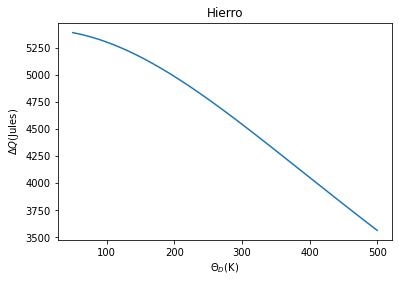

In [ ]:

from scipy import constants as cts
import math
from scipy import integrate

D=[] #Temperatura de Debye de 50k a 500k
dQ=[] #Valor de la ecuación de DeltaQ para cada temperatura de Debye
Dmin=50
Dmax=500
n=450
dD=(Dmax-Dmin)/n
for i in range(0,n+1):
  D.append(50+i*dD)


Ti=294 #Temperatura inicial (ambiente)
Tf=77 #Temperatura final (nitrogeno liquido)
R=cts.R #Constante de los gases ideales
k=cts.k #K_Boltzmann
Na=cts.N_A #N_avogadro

N=55.9*Na/55.845;title='Hierro' #Hierro
#N=18.5*Na/26.981539 ;title='Aluminio' #Aluminio
#N=25.2*Na/63.546 ;title='Cobre' #Cobre
def func(x):
    return x**3/(math.exp(x)-1) #Ec dentro de la integral
for Di in list(D):
  fAreai,erri = integrate.quad(func,0,Di/Ti) #Integral de la Ec hasta Ti
  fAreaf,errf = integrate.quad(func,0,Di/Tf) #Integral de la Ec hasta Tf
  DeltaQ=9*N*k*((Ti*(Ti/Di)**3)*fAreai-(Tf*(Tf/Di)**3)*fAreaf) #Valor del calor
  dQ.append(DeltaQ)

#GRAFICA
plt.plot(D,dQ)
plt.title(title)
plt.ylabel("$\Delta Q$(Jules)")
plt.xlabel("${\Theta}_D$(K)")

L=47.23 #Calor latente nitrógeno
#DeltaM= 8.3 #Aluminio
DeltaM= 10.0 #Hierro
#DeltaM= 6.9 #Cobre

dQ_exp= DeltaM*L #Calor absorbido por el material (calorias)
dQ_jules= dQ_exp*4.189 #Calor en Jules
print('El calor ganado por el '+title+' es', round(dQ_jules),'Jules')